In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

from google.colab import drive
drive.mount('/content/drive')
df1=pd.read_csv('/content/drive/MyDrive/amina/drugsComTrain_raw.csv',encoding="ISO-8859-1")
df2=pd.read_csv('/content/drive/MyDrive/amina/drugsComTest_raw.csv',encoding="ISO-8859-1")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df1

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37
...,...,...,...,...,...,...,...
161292,191035,Campral,Alcohol Dependence,"""I wrote my first report in Mid-October of 201...",10,31-May-15,125
161293,127085,Metoclopramide,Nausea/Vomiting,"""I was given this in IV before surgey. I immed...",1,1-Nov-11,34
161294,187382,Orencia,Rheumatoid Arthritis,"""Limited improvement after 4 months, developed...",2,15-Mar-14,35
161295,47128,Thyroid desiccated,Underactive Thyroid,"""I&#039;ve been on thyroid medication 49 years...",10,19-Sep-15,79


In [ ]:
df2

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10,28-Feb-12,22
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8,17-May-09,17
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9,29-Sep-17,3
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9,5-Mar-17,35
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9,22-Oct-15,4
...,...,...,...,...,...,...,...
53761,159999,Tamoxifen,"Breast Cancer, Prevention","""I have taken Tamoxifen for 5 years. Side effe...",10,13-Sep-14,43
53762,140714,Escitalopram,Anxiety,"""I&#039;ve been taking Lexapro (escitaploprgra...",9,8-Oct-16,11
53763,130945,Levonorgestrel,Birth Control,"""I&#039;m married, 34 years old and I have no ...",8,15-Nov-10,7
53764,47656,Tapentadol,Pain,"""I was prescribed Nucynta for severe neck/shou...",1,28-Nov-11,20


In [ ]:
df=pd.concat([df1,df2],axis=0)
df.reset_index(drop=True,inplace=True)
df

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37
...,...,...,...,...,...,...,...
215058,159999,Tamoxifen,"Breast Cancer, Prevention","""I have taken Tamoxifen for 5 years. Side effe...",10,13-Sep-14,43
215059,140714,Escitalopram,Anxiety,"""I&#039;ve been taking Lexapro (escitaploprgra...",9,8-Oct-16,11
215060,130945,Levonorgestrel,Birth Control,"""I&#039;m married, 34 years old and I have no ...",8,15-Nov-10,7
215061,47656,Tapentadol,Pain,"""I was prescribed Nucynta for severe neck/shou...",1,28-Nov-11,20


In [ ]:
df.shape

(215063, 7)

In [ ]:
df.describe()

,uniqueID,rating,usefulCount
count,215063.000000,215063.000000,215063.000000
mean,116039.364814,6.990008,28.001004
std,67007.913366,3.275554,36.346069
min,0.000000,1.000000,0.000000
25%,58115.500000,5.000000,6.000000
50%,115867.000000,8.000000,16.000000
75%,173963.500000,10.000000,36.000000
max,232291.000000,10.000000,1291.000000


In [ ]:
df.head(10)

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37
5,155963,Cialis,Benign Prostatic Hyperplasia,"""2nd day on 5mg started to work with rock hard...",2,28-Nov-15,43
6,165907,Levonorgestrel,Emergency Contraception,"""He pulled out, but he cummed a bit in me. I t...",1,7-Mar-17,5
7,102654,Aripiprazole,Bipolar Disorde,"""Abilify changed my life. There is hope. I was...",10,14-Mar-15,32
8,74811,Keppra,Epilepsy,""" I Ve had nothing but problems with the Kepp...",1,9-Aug-16,11
9,48928,Ethinyl estradiol / levonorgestrel,Birth Control,"""I had been on the pill for many years. When m...",8,8-Dec-16,1


In [ ]:
df.tail(10)

,uniqueID,drugName,condition,review,rating,date,usefulCount
215053,193118,Dextroamphetamine,ADHD,"""Treatment for ADHD save my life. Don&#039;t b...",10,15-Nov-15,36
215054,35261,Levofloxacin,Bronchitis,"""This is my 3rd time taking this medicine. Fir...",10,26-Oct-14,29
215055,139347,Armodafinil,Narcolepsy,"""This medicine kept me from sleeping the whole...",1,30-Sep-14,18
215056,33495,Microgestin Fe 1 / 20,Birth Control,"""I was on Microgestin for about 3 years. Over ...",6,1-Aug-14,15
215057,123432,Apri,Birth Control,"""I started taking Apri about 7 months ago. My ...",9,25-Aug-10,18
215058,159999,Tamoxifen,"Breast Cancer, Prevention","""I have taken Tamoxifen for 5 years. Side effe...",10,13-Sep-14,43
215059,140714,Escitalopram,Anxiety,"""I&#039;ve been taking Lexapro (escitaploprgra...",9,8-Oct-16,11
215060,130945,Levonorgestrel,Birth Control,"""I&#039;m married, 34 years old and I have no ...",8,15-Nov-10,7
215061,47656,Tapentadol,Pain,"""I was prescribed Nucynta for severe neck/shou...",1,28-Nov-11,20
215062,113712,Arthrotec,Sciatica,"""It works!!!""",9,13-Sep-09,46


In [ ]:
df.isna().sum()

uniqueID          0
drugName          0
condition      1194
review            0
rating            0
date              0
usefulCount       0
dtype: int64

In [ ]:
df.dropna(subset=['condition'], inplace=True)
df.isna().sum()

uniqueID       0
drugName       0
condition      0
review         0
rating         0
date           0
usefulCount    0
dtype: int64

In [ ]:
df.shape

(213869, 7)

DATA VISUALIZATION

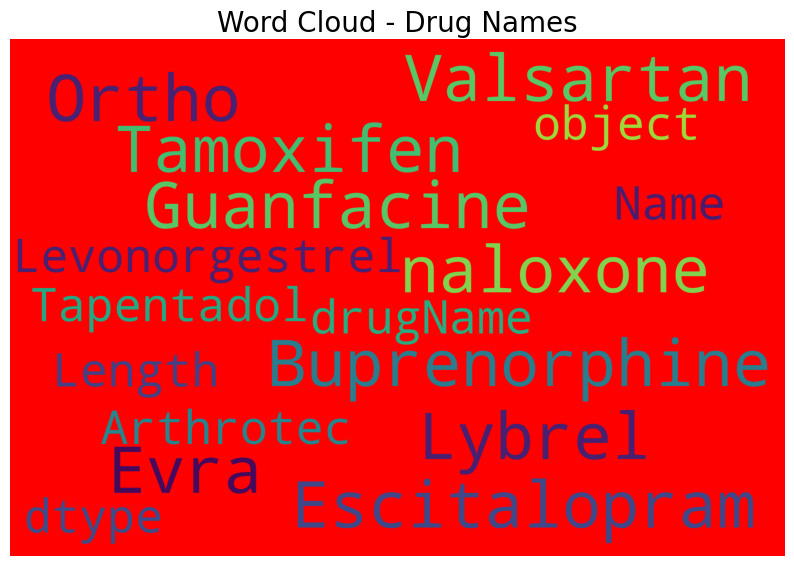

In [ ]:
from wordcloud import WordCloud, STOPWORDS

stopwords = set(STOPWORDS)
wordcloud = WordCloud(
    background_color='red',
    stopwords=stopwords,
    max_words=200,
    max_font_size=100,
    scale=3,
    random_state=42,
    colormap='viridis',
    width=1200,
    height=800).generate(str(df['drugName']))

plt.rcParams['figure.figsize'] = (10, 8)
plt.title('Word Cloud - Drug Names', fontsize=20)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

Text(0, 0.5, 'Drugnames')

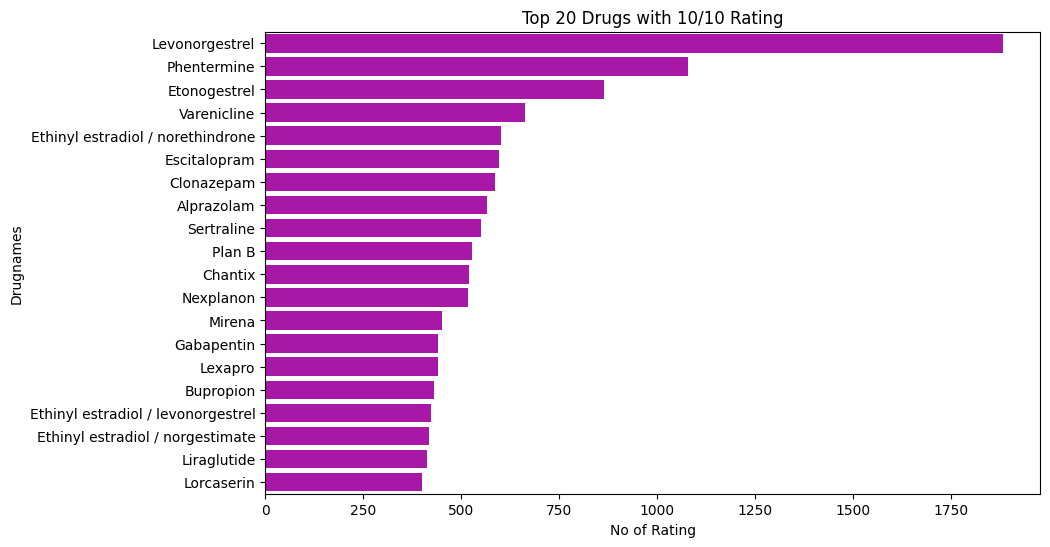

In [ ]:
top_rated_drugs = df[df['rating'] == 10]['drugName'].value_counts().head(20)
top_rated_df = pd.DataFrame({'DrugName': top_rated_drugs.index, 'Count': top_rated_drugs.values})
plt.figure(figsize=(10,6))
sns.barplot(data=top_rated_df, y='DrugName',x='Count',color='m')
plt.title('Top 20 Drugs with 10/10 Rating')
plt.xlabel('No of Rating')
plt.ylabel('Drugnames')



Text(0, 0.5, 'Drugnames')

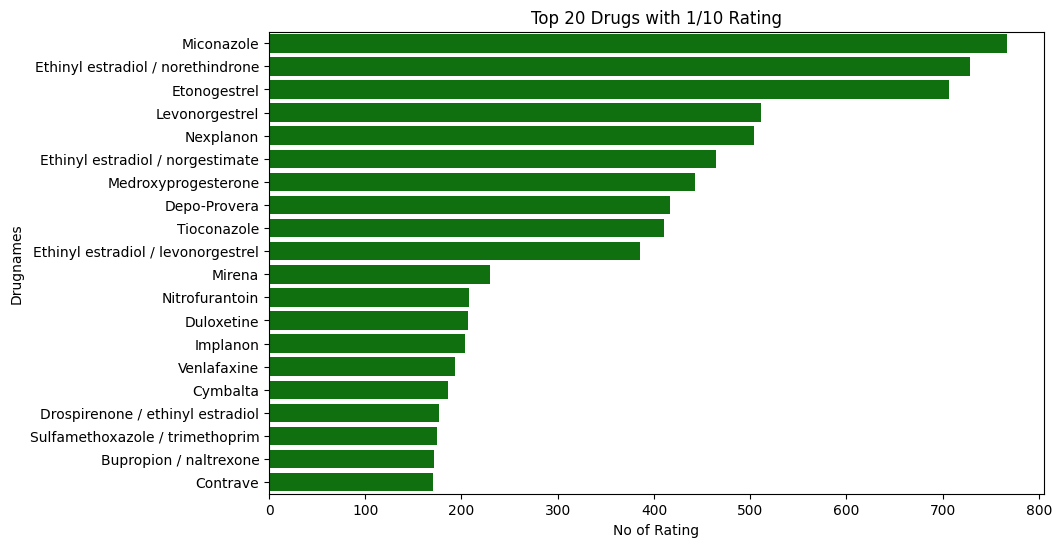

In [ ]:
top_rated_drugs = df[df['rating'] == 1]['drugName'].value_counts().head(20)
top_rated_df = pd.DataFrame({'DrugName': top_rated_drugs.index, 'Count': top_rated_drugs.values})
plt.figure(figsize=(10,6))
sns.barplot(data=top_rated_df, y='DrugName',x='Count',color='g')
plt.title('Top 20 Drugs with 1/10 Rating')
plt.xlabel('No of Rating')
plt.ylabel('Drugnames')

In [ ]:
a=df['rating'].value_counts()
a

rating
10    67682
9     36499
1     28769
8     24909
7     12470
5     10650
2      9203
3      8662
6      8403
4      6622
Name: count, dtype: int64

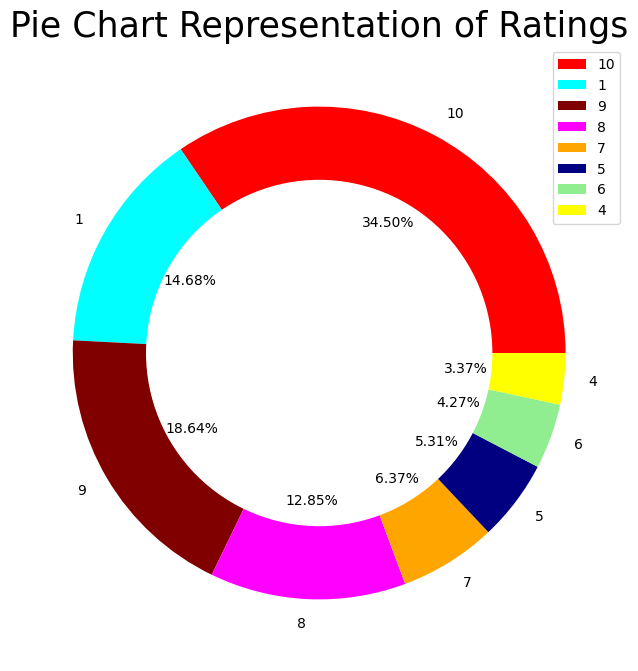

In [ ]:
# donut chart
size = [31431, 13371, 16979, 11710, 5803, 4839, 3893, 3070]
colors = ['red', 'cyan', 'maroon',  'magenta', 'orange', 'navy', 'lightgreen', 'yellow']
labels = "10", "1", "9", "8", "7", "5", "6", "4"

my_circle = plt.Circle((0, 0), 0.7, color = 'white')

plt.rcParams['figure.figsize'] = (8, 8)
plt.pie(size,colors = colors, labels = labels, autopct = '%.2f%%')
plt.axis('off')
plt.title('Pie Chart Representation of Ratings', fontsize = 25)
p = plt.gcf()
plt.gca().add_artist(my_circle)
plt.legend()
plt.show()

Text(0, 0.5, 'Frequency')

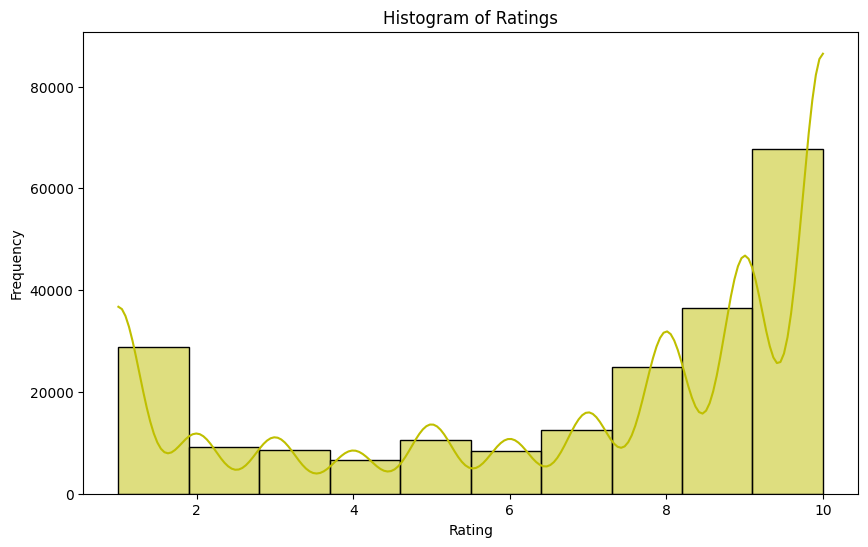

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='rating', bins=10, kde=True,color='y')
plt.title('Histogram of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')


In [ ]:
df['condition'].value_counts()

condition
Birth Control                                   38436
Depression                                      12164
Pain                                             8245
Anxiety                                          7812
Acne                                             7435
                                                ...  
Systemic Candidiasis                                1
Wilson's Disease                                    1
unctional Gastric Disorde                           1
Sepsis                                              1
105</span> users found this comment helpful.        1
Name: count, Length: 916, dtype: int64

<ipython-input-23-f36aa821e186>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='condition', order=df['condition'].value_counts().index[:20],palette='summer')


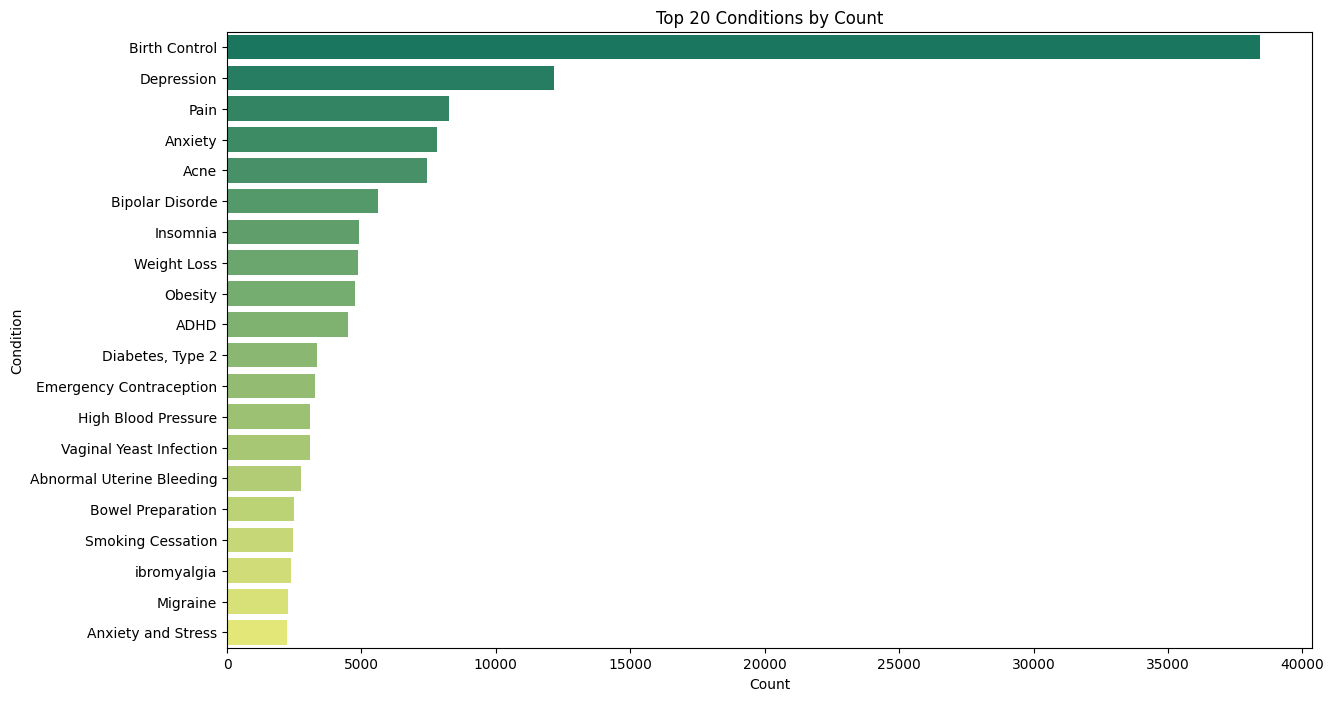

In [ ]:
plt.figure(figsize=(14,8))
sns.countplot(data=df, y='condition', order=df['condition'].value_counts().index[:20],palette='summer')
plt.title('Top 20 Conditions by Count')
plt.xlabel('Count')
plt.ylabel('Condition')
plt.show()

<ipython-input-24-414f3db3779e>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['usefulCount'], color = 'orange')


Text(0, 0.5, 'No. of Useful Counts')

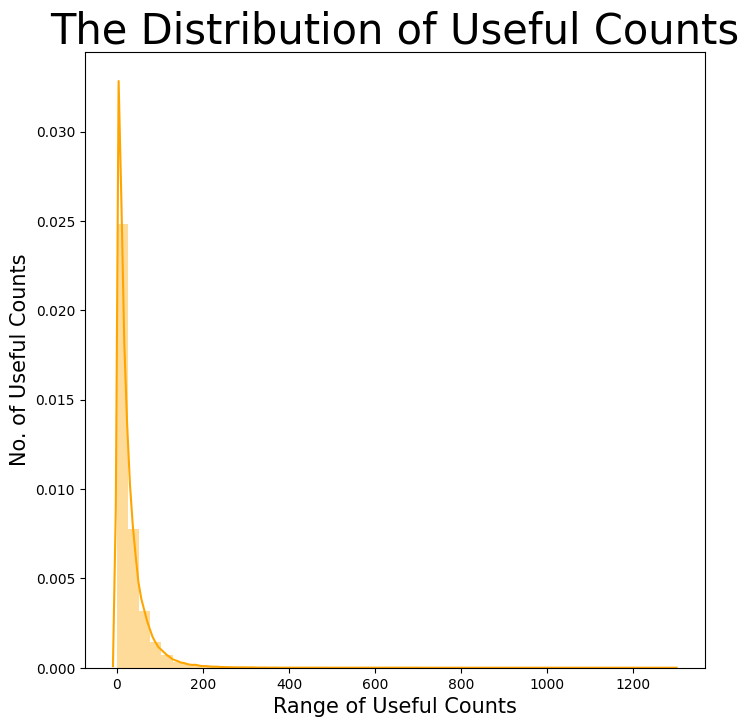

In [ ]:
sns.distplot(df['usefulCount'], color = 'orange')
plt.title('The Distribution of Useful Counts', fontsize = 30)
plt.xlabel('Range of Useful Counts', fontsize = 15)
plt.ylabel('No. of Useful Counts', fontsize = 15)


In [ ]:
df['review'].head()

0    "It has no side effect, I take it in combinati...
1    "My son is halfway through his fourth week of ...
2    "I used to take another oral contraceptive, wh...
3    "This is my first time using any form of birth...
4    "Suboxone has completely turned my life around...
Name: review, dtype: object

In [ ]:
# from textblob import TextBlob
# def classify_sentiment(text):
#     polarity = TextBlob(text).sentiment.polarity
#     if polarity > 0:
#         return 'positive'
#     elif polarity < 0:
#         return 'negative'
#     else:
#         return 'neutral'

# # Apply sentiment classification
# df['sentiment'] = df['review'].apply(classify_sentiment)

In [ ]:
df['sentiment']=df['rating'].apply(lambda x: 'Positive' if x>7 else('Negative' if x<4 else 'Neutral'))
df

,uniqueID,drugName,condition,review,rating,date,usefulCount,sentiment
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27,Positive
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192,Positive
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17,Neutral
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10,Positive
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37,Positive
...,...,...,...,...,...,...,...,...
215058,159999,Tamoxifen,"Breast Cancer, Prevention","""I have taken Tamoxifen for 5 years. Side effe...",10,13-Sep-14,43,Positive
215059,140714,Escitalopram,Anxiety,"""I&#039;ve been taking Lexapro (escitaploprgra...",9,8-Oct-16,11,Positive
215060,130945,Levonorgestrel,Birth Control,"""I&#039;m married, 34 years old and I have no ...",8,15-Nov-10,7,Positive
215061,47656,Tapentadol,Pain,"""I was prescribed Nucynta for severe neck/shou...",1,28-Nov-11,20,Negative


In [ ]:
v=df['sentiment'].value_counts()
v

sentiment
Positive    129090
Negative     46634
Neutral      38145
Name: count, dtype: int64

In [ ]:
v1=df['sentiment'].unique()
v1

array(['Positive', 'Neutral', 'Negative'], dtype=object)

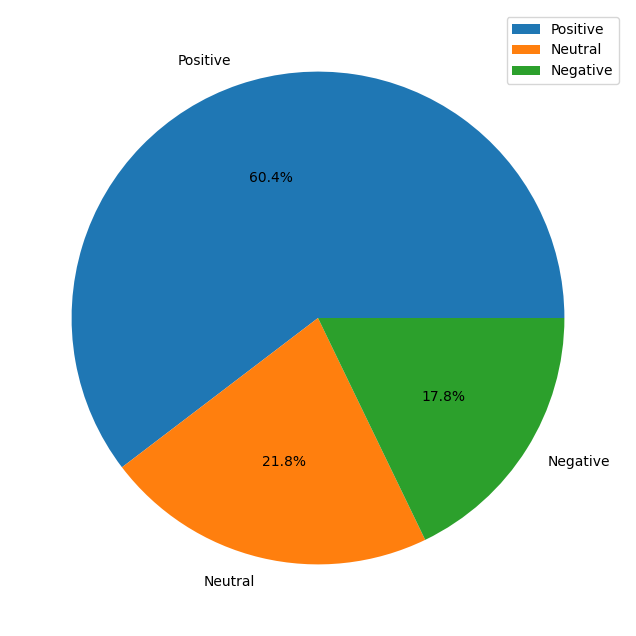

In [ ]:
plt.pie(v,labels=v1,autopct='%1.1f%%')
plt.legend()

In [ ]:
positive_reviews = df[df['sentiment'] == 'Positive']



In [ ]:
sampled_positive_reviews = positive_reviews.sample(frac=0.70, random_state=42)


In [ ]:
df= df.drop(sampled_positive_reviews.index)
df

,uniqueID,drugName,condition,review,rating,date,usefulCount,sentiment
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17,Neutral
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10,Positive
5,155963,Cialis,Benign Prostatic Hyperplasia,"""2nd day on 5mg started to work with rock hard...",2,28-Nov-15,43,Negative
6,165907,Levonorgestrel,Emergency Contraception,"""He pulled out, but he cummed a bit in me. I t...",1,7-Mar-17,5,Negative
8,74811,Keppra,Epilepsy,""" I Ve had nothing but problems with the Kepp...",1,9-Aug-16,11,Negative
...,...,...,...,...,...,...,...,...
215052,194823,Levetiracetam,Epilepsy,"""I now suffer from excessive tiredness and lac...",8,21-Jul-16,5,Positive
215055,139347,Armodafinil,Narcolepsy,"""This medicine kept me from sleeping the whole...",1,30-Sep-14,18,Negative
215056,33495,Microgestin Fe 1 / 20,Birth Control,"""I was on Microgestin for about 3 years. Over ...",6,1-Aug-14,15,Neutral
215059,140714,Escitalopram,Anxiety,"""I&#039;ve been taking Lexapro (escitaploprgra...",9,8-Oct-16,11,Positive


In [ ]:
negative_reviews = df[df['sentiment'] == 'Negative']

In [ ]:
sampled_negative_reviews = negative_reviews.sample(frac=0.15, random_state=42)

In [ ]:
df= df.drop(sampled_negative_reviews.index)
df

,uniqueID,drugName,condition,review,rating,date,usefulCount,sentiment
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17,Neutral
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10,Positive
5,155963,Cialis,Benign Prostatic Hyperplasia,"""2nd day on 5mg started to work with rock hard...",2,28-Nov-15,43,Negative
6,165907,Levonorgestrel,Emergency Contraception,"""He pulled out, but he cummed a bit in me. I t...",1,7-Mar-17,5,Negative
8,74811,Keppra,Epilepsy,""" I Ve had nothing but problems with the Kepp...",1,9-Aug-16,11,Negative
...,...,...,...,...,...,...,...,...
215052,194823,Levetiracetam,Epilepsy,"""I now suffer from excessive tiredness and lac...",8,21-Jul-16,5,Positive
215055,139347,Armodafinil,Narcolepsy,"""This medicine kept me from sleeping the whole...",1,30-Sep-14,18,Negative
215056,33495,Microgestin Fe 1 / 20,Birth Control,"""I was on Microgestin for about 3 years. Over ...",6,1-Aug-14,15,Neutral
215059,140714,Escitalopram,Anxiety,"""I&#039;ve been taking Lexapro (escitaploprgra...",9,8-Oct-16,11,Positive


In [ ]:
df.reset_index(drop=True,inplace=True)
df

,uniqueID,drugName,condition,review,rating,date,usefulCount,sentiment
0,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17,Neutral
1,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10,Positive
2,155963,Cialis,Benign Prostatic Hyperplasia,"""2nd day on 5mg started to work with rock hard...",2,28-Nov-15,43,Negative
3,165907,Levonorgestrel,Emergency Contraception,"""He pulled out, but he cummed a bit in me. I t...",1,7-Mar-17,5,Negative
4,74811,Keppra,Epilepsy,""" I Ve had nothing but problems with the Kepp...",1,9-Aug-16,11,Negative
...,...,...,...,...,...,...,...,...
116506,194823,Levetiracetam,Epilepsy,"""I now suffer from excessive tiredness and lac...",8,21-Jul-16,5,Positive
116507,139347,Armodafinil,Narcolepsy,"""This medicine kept me from sleeping the whole...",1,30-Sep-14,18,Negative
116508,33495,Microgestin Fe 1 / 20,Birth Control,"""I was on Microgestin for about 3 years. Over ...",6,1-Aug-14,15,Neutral
116509,140714,Escitalopram,Anxiety,"""I&#039;ve been taking Lexapro (escitaploprgra...",9,8-Oct-16,11,Positive


In [ ]:
v2=df['sentiment'].value_counts()
v2

sentiment
Negative    39639
Positive    38727
Neutral     38145
Name: count, dtype: int64

In [ ]:
v3=df['sentiment'].unique()
v3

array(['Neutral', 'Positive', 'Negative'], dtype=object)

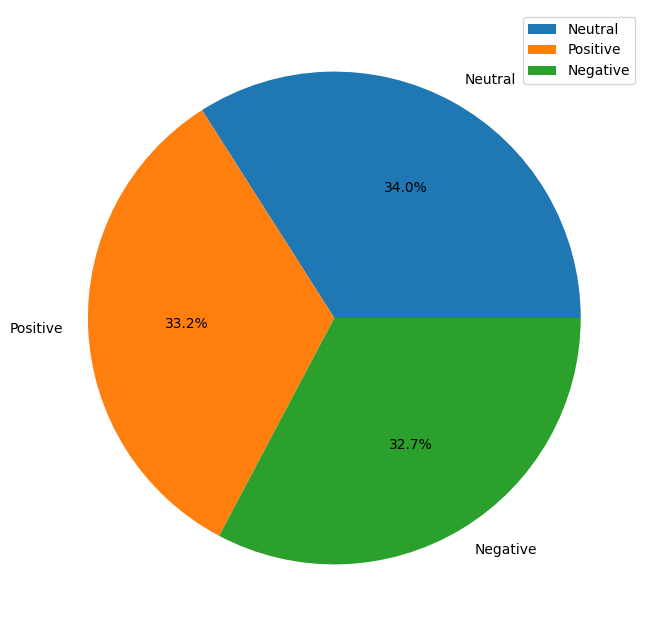

In [ ]:
plt.pie(v2,labels=v3,autopct='%1.1f%%')
plt.legend()

In [ ]:
df.drop(['uniqueID', 'drugName', 'condition', 'rating', 'date', 'usefulCount'],inplace=True,axis=1)


In [ ]:
df.dtypes

review       object
sentiment    object
dtype: object

In [ ]:
df

,review,sentiment
0,"""I used to take another oral contraceptive, wh...",Neutral
1,"""This is my first time using any form of birth...",Positive
2,"""2nd day on 5mg started to work with rock hard...",Negative
3,"""He pulled out, but he cummed a bit in me. I t...",Negative
4,""" I Ve had nothing but problems with the Kepp...",Negative
...,...,...
116506,"""I now suffer from excessive tiredness and lac...",Positive
116507,"""This medicine kept me from sleeping the whole...",Negative
116508,"""I was on Microgestin for about 3 years. Over ...",Neutral
116509,"""I&#039;ve been taking Lexapro (escitaploprgra...",Positive


In [ ]:
df['review']

0         "I used to take another oral contraceptive, wh...
1         "This is my first time using any form of birth...
2         "2nd day on 5mg started to work with rock hard...
3         "He pulled out, but he cummed a bit in me. I t...
4         " I Ve had  nothing but problems with the Kepp...
                                ...                        
116506    "I now suffer from excessive tiredness and lac...
116507    "This medicine kept me from sleeping the whole...
116508    "I was on Microgestin for about 3 years. Over ...
116509    "I&#039;ve been taking Lexapro (escitaploprgra...
116510    "I was prescribed Nucynta for severe neck/shou...
Name: review, Length: 116511, dtype: object

In [ ]:
df.shape

(116511, 2)

In [ ]:
from nltk.tokenize import word_tokenize
from nltk.tokenize import TweetTokenizer
tk=TweetTokenizer()
df['review']=df['review'].apply(lambda x:tk.tokenize(x)).apply(lambda x: ' '.join(x))

df['review']

0         " I used to take another oral contraceptive , ...
1         " This is my first time using any form of birt...
2         " 2nd day on 5mg started to work with rock har...
3         " He pulled out , but he cummed a bit in me . ...
4         " I Ve had nothing but problems with the Keppe...
                                ...                        
116506    " I now suffer from excessive tiredness and la...
116507    " This medicine kept me from sleeping the whol...
116508    " I was on Microgestin for about 3 years . Ove...
116509    " I've been taking Lexapro ( escitaploprgram )...
116510    " I was prescribed Nucynta for severe neck / s...
Name: review, Length: 116511, dtype: object

In [ ]:
# remove special characters
import re
df['review']=df['review'].str.replace('[^a-zA-Z0-9]',' ',regex=True)
df['review']

0           I used to take another oral contraceptive   ...
1           This is my first time using any form of birt...
2           2nd day on 5mg started to work with rock har...
3           He pulled out   but he cummed a bit in me   ...
4           I Ve had nothing but problems with the Keppe...
                                ...                        
116506      I now suffer from excessive tiredness and la...
116507      This medicine kept me from sleeping the whol...
116508      I was on Microgestin for about 3 years   Ove...
116509      I ve been taking Lexapro   escitaploprgram  ...
116510      I was prescribed Nucynta for severe neck   s...
Name: review, Length: 116511, dtype: object

In [ ]:
# remove the words having less than 3 characters
from nltk.tokenize import word_tokenize
df['review']=df['review'].apply(lambda x:' '.join((w for w in tk.tokenize(x) if len(w)>=3)))
df['review']

0         used take another oral contraceptive which had...
1         This first time using any form birth control g...
2         2nd day 5mg started work with rock hard erecti...
3         pulled out but cummed bit took the Plan hours ...
4         had nothing but problems with the Keppera cons...
                                ...                        
116506    now suffer from excessive tiredness and lack e...
116507    This medicine kept from sleeping the whole day...
116508    was Microgestin for about years Over the past ...
116509    been taking Lexapro escitaploprgram since Febr...
116510    was prescribed Nucynta for severe neck shoulde...
Name: review, Length: 116511, dtype: object

In [ ]:
nltk.download('punkt')
from nltk.corpus import stopwords
nltk.download('stopwords')
data=stopwords.words('english')
df['review'] = df['review'].apply(lambda x: ' '.join([w for w in tk.tokenize(x) if len(w)>=3 and w.lower() not in data]))
df['review']

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0         used take another oral contraceptive pill cycl...
1         first time using form birth control glad went ...
2         2nd day 5mg started work rock hard erections h...
3         pulled cummed bit took Plan hours later took p...
4         nothing problems Keppera constant shaking arms...
                                ...                        
116506    suffer excessive tiredness lack energy consult...
116507    medicine kept sleeping whole days body started...
116508    Microgestin years past year started get extrem...
116509    taking Lexapro escitaploprgram since February ...
116510    prescribed Nucynta severe neck shoulder pain t...
Name: review, Length: 116511, dtype: object

Finding Outliers

In [ ]:
# Calculate the length of each review
df['review_length'] = df['review'].apply(len)

# Define outliers based on text length (e.g., above 95th percentile or below 3rd percentile)
q1 = df['review_length'].quantile(0.03)
q3 = df['review_length'].quantile(0.95)

print(f"0.03 quantile value: {q1}")
print(f"0.95 quantile value: {q3}")

# Identify outliers
outliers = df[(df['review_length'] < q1) | (df['review_length'] > q3)]

print("Outliers based on review length:")
print(outliers)

0.03 quantile value: 35.0
0.95 quantile value: 472.0
Outliers based on review length:
                                                   review sentiment  \
37                                     caused gain pounds  Negative   
44      caucasian male Developed diagnosed Developed t...   Neutral   
48      Drinking extra 16oz bottles water period takin...  Positive   
102                      medicine nothing pain Glad works  Negative   
113     opoids chronic back pain Used Miralax Metamuci...  Negative   
...                                                   ...       ...   
116434  May 2017 second week contrave take pills day p...  Positive   
116440                                       changed life  Positive   
116441                      Reduced burning significantly  Positive   
116479  old female taken combination atenolol chloroth...   Neutral   
116509  taking Lexapro escitaploprgram since February ...  Positive   

        review_length  
37                 18  
44           

In [ ]:
df['review_length']

0         454
1         244
2         284
3          84
4         119
         ... 
116506     71
116507     89
116508    411
116509    476
116510    123
Name: review_length, Length: 116511, dtype: int64

In [ ]:
df

,review,sentiment,review_length
0,used take another oral contraceptive pill cycl...,Neutral,454
1,first time using form birth control glad went ...,Positive,244
2,2nd day 5mg started work rock hard erections h...,Negative,284
3,pulled cummed bit took Plan hours later took p...,Negative,84
4,nothing problems Keppera constant shaking arms...,Negative,119
...,...,...,...
116506,suffer excessive tiredness lack energy consult...,Positive,71
116507,medicine kept sleeping whole days body started...,Negative,89
116508,Microgestin years past year started get extrem...,Neutral,411
116509,taking Lexapro escitaploprgram since February ...,Positive,476


Remove outliers

In [ ]:
df = df[(df['review_length'] >= q1) & (df['review_length'] <= q3)].reset_index(drop=True)

print("DataFrame after removing outliers:")
df

DataFrame after removing outliers:


,review,sentiment,review_length
0,used take another oral contraceptive pill cycl...,Neutral,454
1,first time using form birth control glad went ...,Positive,244
2,2nd day 5mg started work rock hard erections h...,Negative,284
3,pulled cummed bit took Plan hours later took p...,Negative,84
4,nothing problems Keppera constant shaking arms...,Negative,119
...,...,...,...
107329,help craved chocolate time worth month,Negative,38
107330,suffer excessive tiredness lack energy consult...,Positive,71
107331,medicine kept sleeping whole days body started...,Negative,89
107332,Microgestin years past year started get extrem...,Neutral,411


In [ ]:
from nltk.stem import SnowballStemmer
stm=SnowballStemmer('english')
df['review']=df['review'].apply(lambda x: [stm.stem(i.lower()) for i in tk.tokenize(x)]).apply(lambda x: ' '.join(x))
# to remove the tail and convert it into lowercase
df['review']


0         use take anoth oral contracept pill cycl happi...
1         first time use form birth control glad went pa...
2         2nd day 5mg start work rock hard erect howev e...
3         pull cum bit took plan hour later took pregnan...
4         noth problem keppera constant shake arm leg pi...
                                ...                        
107329                   help crave chocol time worth month
107330    suffer excess tired lack energi consult altern...
107331    medicin kept sleep whole day bodi start shut e...
107332    microgestin year past year start get extrem ba...
107333    prescrib nucynta sever neck shoulder pain take...
Name: review, Length: 107334, dtype: object

In [ ]:
df

,review,sentiment,review_length
0,use take anoth oral contracept pill cycl happi...,Neutral,454
1,first time use form birth control glad went pa...,Positive,244
2,2nd day 5mg start work rock hard erect howev e...,Negative,284
3,pull cum bit took plan hour later took pregnan...,Negative,84
4,noth problem keppera constant shake arm leg pi...,Negative,119
...,...,...,...
107329,help crave chocol time worth month,Negative,38
107330,suffer excess tired lack energi consult altern...,Positive,71
107331,medicin kept sleep whole day bodi start shut e...,Negative,89
107332,microgestin year past year start get extrem ba...,Neutral,411


In [ ]:
# vectorization
# we use the method TFIDF method
senti=df['review']
from sklearn.feature_extraction.text import TfidfVectorizer
vec=TfidfVectorizer()
data=vec.fit_transform(senti)
data

<107334x27962 sparse matrix of type '<class 'numpy.float64'>'
	with 3615343 stored elements in Compressed Sparse Row format>

In [ ]:
print(data)

  (0, 3006)	0.19071275330193282
  (0, 24600)	0.17903109161973102
  (0, 11178)	0.09991217320123309
  (0, 13221)	0.11751316025225486
  (0, 19711)	0.09810502217413848
  (0, 8597)	0.11853418024671841
  (0, 5365)	0.13154726019481502
  (0, 7739)	0.08796314382521656
  (0, 23626)	0.060895011263697583
  (0, 27509)	0.07486348763410673
  (0, 10042)	0.06473322886444868
  (0, 11832)	0.060601132451007636
  (0, 24816)	0.06893303344512927
  (0, 24827)	0.3118254793041347
  (0, 18544)	0.19617755968719544
  (0, 22202)	0.08144688931060112
  (0, 27124)	0.19058331827095093
  (0, 25708)	0.1964809015329781
  (0, 14684)	0.12823783898534025
  (0, 21854)	0.08359603350274195
  (0, 13749)	0.12974675743381664
  (0, 10746)	0.05096736435011277
  (0, 13335)	0.09392602632097774
  (0, 23519)	0.0474981373105437
  (0, 9655)	0.16892014026289345
  :	:
  (107332, 7166)	0.07705509188959025
  (107332, 4868)	0.08394768146205882
  (107332, 23626)	0.07227374404807772
  (107332, 11832)	0.07192495156657985
  (107332, 24816)	0.08181

In [ ]:
data.shape

(107334, 27962)

In [ ]:
y=df['sentiment'].values
y

array(['Neutral', 'Positive', 'Negative', ..., 'Negative', 'Neutral',
       'Negative'], dtype=object)

In [ ]:
df['sentiment'].value_counts()

sentiment
Negative    36427
Neutral     35486
Positive    35421
Name: count, dtype: int64

In [ ]:
x=data

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=32)
x_train

<85867x27962 sparse matrix of type '<class 'numpy.float64'>'
	with 2893295 stored elements in Compressed Sparse Row format>

In [ ]:
x_test

<21467x27962 sparse matrix of type '<class 'numpy.float64'>'
	with 722048 stored elements in Compressed Sparse Row format>

In [ ]:
y_train

array(['Positive', 'Neutral', 'Negative', ..., 'Positive', 'Neutral',
       'Neutral'], dtype=object)

In [ ]:
y_test

array(['Positive', 'Neutral', 'Positive', ..., 'Neutral', 'Neutral',
       'Neutral'], dtype=object)

In [ ]:

from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=200, random_state=1,max_depth=None, min_samples_split=2,min_samples_leaf=2,bootstrap=False)
rf_classifier.fit(x_train, y_train)



RandomForestClassifier(bootstrap=False, min_samples_leaf=2, n_estimators=200,
                       random_state=1)

In [ ]:
y_pred = rf_classifier.predict(x_test)
y_pred
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,ConfusionMatrixDisplay
cm=confusion_matrix(y_test,y_pred)
cm

array([[6231,  410,  615],
       [ 866, 5159, 1073],
       [ 577,  628, 5908]])

In [ ]:
print(accuracy_score(y_pred,y_test))

0.8057949410723436


In [ ]:
import pickle

def real_time_review_test(reviews):
    # Load the model and vectorizer
   # Save the classifier
  with open('rf_classifier1.pkl', 'wb') as f:
    pickle.dump(rf_classifier, f)

# Save the vectorizer
  with open('tfidfvec1.pkl', 'wb') as f:
    pickle.dump(vec, f)
    # Vectorize the input reviews
    X = vec.transform(reviews)

    # Predict using the loaded model
    predictions = rf_classifier.predict(X)

    return predictions

# Example of real-time review testing
new_reviews = ["I love this medication, it works wonders!", "This is the worst drug I have ever taken."]
predictions = real_time_review_test(new_reviews)

print("Real-time Predictions:", predictions)


Real-time Predictions: ['Positive' 'Negative']


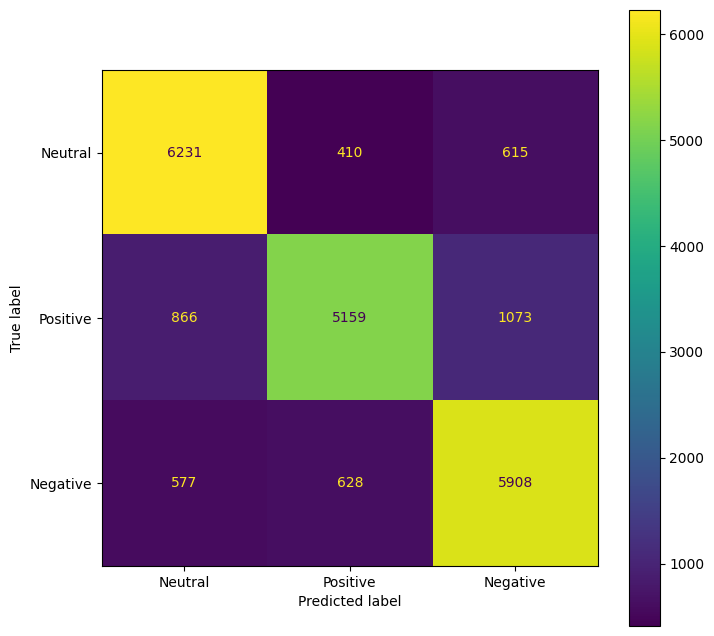

In [ ]:
labels=['Neutral', 'Positive', 'Negative']
cmd=ConfusionMatrixDisplay(cm,display_labels=labels)
cmd.plot()

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

    Negative       0.81      0.86      0.83      7256
     Neutral       0.83      0.73      0.78      7098
    Positive       0.78      0.83      0.80      7113

    accuracy                           0.81     21467
   macro avg       0.81      0.81      0.80     21467
weighted avg       0.81      0.81      0.80     21467

